### 셀레니움 구동 패키지

In [221]:
from selenium import webdriver
from selenium.webdriver.common.by import By

import undetected_chromedriver as uc
# 크롬에서 자동화된 프로그램으로 로그인 하는 것을 막는데, 이를 뚫기 위한 패키지
from time import sleep
# 구동을 일시중지하는 패키지

import numpy as np

### Floor 설정까지 가기

In [222]:
id = "아이디입력"
pw = "비밀번호입력"
driver = uc.Chrome()
driver.set_window_size(1500,900)
# 게더타운 로그인
driver.get("https://accounts.google.com/ServiceLogin/identifier?hl=ko&passive=true&continue=https%3A%2F%2Fwww.google.co.kr%2F%3Fgws_rd%3Dssl&ec=GAZAmgQ&flowName=GlifWebSignIn&flowEntry=ServiceLogin")
driver.find_element(By.XPATH, "//*[@id='identifierId']").send_keys(id)
driver.find_element(By.XPATH, "//*[@id='identifierNext']/div/button").click()
sleep(2)
driver.find_element(By.XPATH, "//*[@id='password']/div[1]/div/div[1]/input").send_keys(pw)
driver.find_element(By.XPATH, "//*[@id='passwordNext']/div/button/span").click()
sleep(3)
driver.get("https://app.gather.town/signin")
sleep(10)

# 게더타운 들어가기
driver.find_element(By.XPATH, "//*[@id='root']/div/div/div/button").click()
sleep(20)
# STUDY ROOM 들어가기

driver.find_element(By.XPATH, '//*[@id="root"]/div/div[3]/div/div/div[1]/div[3]/button').click()
sleep(20)

# 입장
driver.find_element(By.XPATH, "//*[@id='root']/div/div/div[2]/div[2]/form/div/button").click()
sleep(10)
# 이상한 창 다 내리기
driver.find_element(By.XPATH, '//*[@id="root"]/div/div[6]/div/div[1]/div[1]/div/div/div[5]/div/div/div/div[2]/div[2]/button').click()
driver.find_element(By.XPATH, '/html/body/div[2]/div/div[1]/div[2]/div/button').click()
driver.find_element(By.XPATH, '//*[@id="root"]/div/div[6]/div/div[1]/div[1]/div/div/div[2]/div/div/div/div/div/div[1]/span').click()

# 만들기로 들어가기
driver.find_element(By.XPATH,'//*[@id="root"]/div/div[6]/div/div[2]/div[2]/div[1]/div/button').click()

# 에디터로 들어가기
driver.find_element(By.XPATH,'//*[@id="root"]/div/div[6]/div/div[1]/div[3]/div[2]/div[2]/div[2]/div[7]/button').click()
sleep(10)

# 탭 전환
last_tab = driver.window_handles[-1]
driver.switch_to.window(window_name=last_tab)

# Wall & floor 클릭
driver.find_element(By.XPATH,'//*[@id="root"]/div/div[1]/div[1]/button').click()

# Warning 닫기
driver.find_element(By.XPATH,'//*[@id="root"]/div/div[3]/div/div/div[3]/button').click()

# floor로 접근 닫기
driver.find_element(By.XPATH,'//*[@id="root"]/div/div[1]/div[1]/div[3]/button').click()

### 이미지 불러오고 좌표값 계산하기

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2

(136, 192, 3)


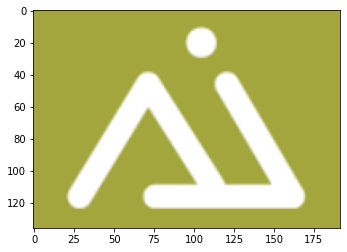

In [3]:
img = cv2.imread("C:/Meta/aivle.png")
print(img.shape)
plt.imshow(img)

In [5]:
img = cv2.imread("C:/Meta/aivle.png")
resize_img = cv2.resize(img, (25, 16))
resize_img = resize_img[:,:,0]
resize_img = resize_img.reshape(16,25)

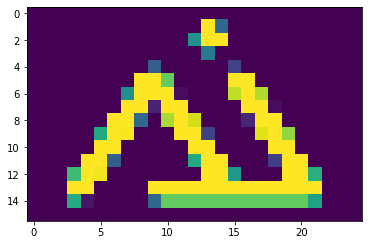

In [6]:
img = cv2.imread("C:/Meta/aivle.png")
resize_img = cv2.resize(img, (25, 16))
resize_img = resize_img[:,:,0]
resize_img = resize_img.reshape(16,25)
plt.imshow(resize_img)

In [7]:
color = []
for i in range(16) :
    for j in range(25) :
        color.append(resize_img[i][j])

In [8]:
len(set(color))

30

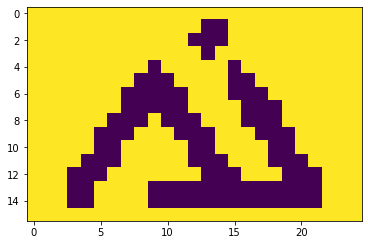

In [10]:
img = cv2.imread("C:/Meta/aivle.png")
resize_img = cv2.resize(img, (25, 16))
resize_img = resize_img[:,:,0]
resize_img = resize_img.reshape(16,25)
back =resize_img[0][0] # 0행 0열의 배경색을 불러온다.
for i in range(16):
    for j in range(25):
        if resize_img[i][j] == back: # 배경색이면
            resize_img[i][j] = 1 # 1이라고 하고
        else: # 배경색이 아니면
            resize_img[i][j] = 0 # 0이라고 한다.
plt.imshow(resize_img)

### 색칠하기

In [225]:
## 세트
# floor 선택
driver.find_element(By.CSS_SELECTOR,'#root > div > div.Layout > div.css-m0ip90 > div:nth-child(1) > div > div > div.Layout > div > div:nth-child(15)').click()

# 색칠하기

import pyautogui

for i in range(len(np.where(resize_img==0)[0])) :
    pyautogui.moveTo(102+np.where(resize_img==0)[1][i]*40,182+np.where(resize_img==0)[0][i]*40)
    pyautogui.click()

In [226]:
## 세트
# floor 선택
driver.find_element(By.CSS_SELECTOR,'#root > div > div.Layout > div.css-m0ip90 > div:nth-child(1) > div > div > div.Layout > div > div:nth-child(16)').click()

# 색칠하기

import pyautogui

for i in range(len(np.where(resize_img==1)[0])) :
    pyautogui.moveTo(102+np.where(resize_img==1)[1][i]*40,182+np.where(resize_img==1)[0][i]*40)
    pyautogui.click()